# 6. Laplace Transformation

<small>Sympy scheint [Problemen](https://github.com/sympy/sympy/issues/10354) zu haben mit Laplace und Piecewise, deshalb mache ich das jetzt in Sage.</small>

In [1]:
from sage import *
%display latex

t,s,u=var('t s u')

## 6.1 Transformation einer stückweise definiertes Funktion

In [2]:
ff=piecewise([
    ((0,2), -t),
    ((2,+oo), t),
])
ff

piecewise(t|-->-t on (0, 2), t|-->t on (2, +oo); t)

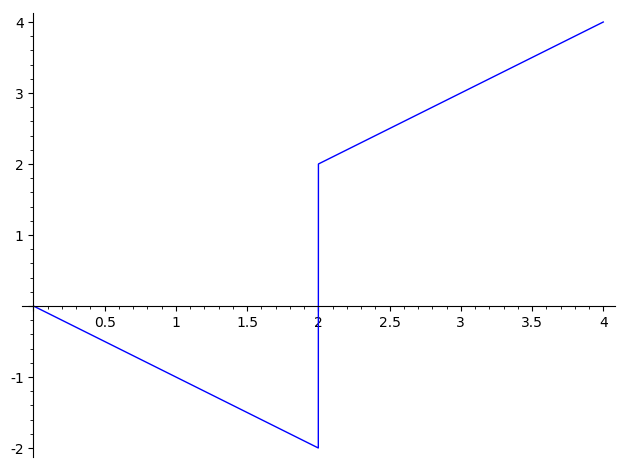

In [3]:
plot(ff,0,4)

In [4]:
ff.laplace(t,s)

2*(2*s + 1)*e^(-2*s)/s^2 - 1/s^2

Von der Transformation, es ist möglich die funktion zu schätzen. Hier, zB, $t=0; t=2$ sind wichtig.

## 6.2 Partialbruchzerlegung und Inverse transformation
### 6.2.1 Beispiel 1
"Finde die Funktion dessen Laplace Transform ist..."

In [5]:
import sympy as ss

In [6]:
fpa=(s**2-2*s)/((s**2)*(s**2-16))
fpa


(s^2 - 2*s)/((s^2 - 16)*s^2)

In [7]:
fpaa=(s**2-2*s)
fpab=(s**2)*(s**2-16)

In [8]:
fpab=fpab.expand()
fpab

s^4 - 16*s^2

In [9]:
fpa=fpaa/fpab
fpa

(s^2 - 2*s)/(s^4 - 16*s^2)

#### Partialbruchzerlegung:

In [10]:
print(fpa.partial_fraction(s))

-3/16/(s + 4) + 1/16/(s - 4) + 1/8/s


Von jedes Teil:

In [11]:
fpa1=-3/16/(s + 4)
fpa2= 1/16/(s - 4)
fpa3= 1/8/s

In [12]:
i1=inverse_laplace(fpa1,s,t);i1

-3/16*e^(-4*t)

In [13]:
i2=inverse_laplace(fpa2,s,t);i2

1/16*e^(4*t)

In [14]:
i3=inverse_laplace(fpa3,s,t);i3

1/8

In [15]:
bool(inverse_laplace(fpa,s,t)==i1+i2+i3)

True

### 6.2.2 Beispiel 2

In [16]:
fpal=(2*s**3+6*s**2-4*s-14)/(s**4+2*s**3-2*s**2-6*s+5); fpal

2*(s^3 + 3*s^2 - 2*s - 7)/(s^4 + 2*s^3 - 2*s^2 - 6*s + 5)

In [17]:
fpf=fpal.partial_fraction(s);fpf

1/(s^2 + 4*s + 5) + 2/(s - 1) - 1/(s - 1)^2

In [18]:
fpf.operands()

[1/(s^2 + 4*s + 5), 2/(s - 1), -1/(s - 1)^2]

Jetzt versuchen wir jeder davon zu transformieren:

In [19]:
inverses=[]
for op in fpf.operands():
    op=inverse_laplace(op,s,t)
    inverses.append(op)
inverses
    

[e^(-2*t)*sin(t), 2*e^t, -t*e^t]

In [20]:
fpfi=0;
for op in inverses:
    fpfi=fpfi+op;
fpfi

-t*e^t + e^(-2*t)*sin(t) + 2*e^t

Das Inverse von die originelle Funktion:

In [21]:
inverse_laplace(fpal,s,t)

-t*e^t + e^(-2*t)*sin(t) + 2*e^t

In [22]:
bool(inverse_laplace(fpal,s,t)==fpfi)

True

## 6.3 2. Ordung Anfangswertproblem 

$$
4y''-4y'+5y=8e^{-t}\\
y(0)=13\\
y'(0)-2
$$

In [23]:
x=var('x')
t=var('t')
y=function('y')(t)

In [24]:
de = 4*diff(diff(y,t),t) -4*diff(y,t)+5*y-8*e**(-t)
de

-8*e^(-t) + 5*y(t) - 4*diff(y(t), t) + 4*diff(y(t), t, t)

In [25]:
dl=laplace(de,t,s);
pdl=dl;
pdl

4*s^2*laplace(y(t), t, s) - 4*s*laplace(y(t), t, s) - 4*s*y(0) - 8/(s + 1) + 5*laplace(y(t), t, s) + 4*y(0) - 4*D[0](y)(0)

Wir kennen dass
$$
y(0)=13\\
y'(0)-2
$$

In [26]:
pdl=pdl.substitute(y(0)==13);
pdl
#print(pdl)

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


4*s^2*laplace(y(t), t, s) - 4*s*laplace(y(t), t, s) - 52*s - 8/(s + 1) + 5*laplace(y(t), t, s) - 4*D[0](y)(0) + 52

In [27]:
pdl=4*s^2*laplace(y(t), t, s) - 4*s*laplace(y(t), t, s) - 52*s - 8/(s + 1) + 5*laplace(y(t), t, s) - 4*(-2) + 52 
pdl

4*s^2*laplace(y(t), t, s) - 4*s*laplace(y(t), t, s) - 52*s - 8/(s + 1) + 5*laplace(y(t), t, s) + 60

Lösen mit $\mathcal{L}(y)$ als Unbekannte:

In [28]:
sdl=solve(pdl,laplace(y(t),t,s));
(sdl[0])

laplace(y(t), t, s) == 4*(13*s^2 - 2*s - 13)/(4*s^3 + s + 5)

In [29]:
psdl=sdl[0].right().partial_fraction(s)
psdl

4/13*(161*s - 179)/(4*s^2 - 4*s + 5) + 8/13/(s + 1)

In [30]:
il=[]
for o in psdl.operands():
    il.append(inverse_laplace(o,s,t))
il    
#inverse_laplace(sdl[0],s,t)

[1/26*(322*cos(t) - 197*sin(t))*e^(1/2*t), 8/13*e^(-t)]

In [31]:
ill=0;
for i in il:
    ill+=i
ill

1/26*(322*cos(t) - 197*sin(t))*e^(1/2*t) + 8/13*e^(-t)

Überprüfung:

In [32]:
desolve(de,[y,t])

(_K2*cos(t) + _K1*sin(t))*e^(1/2*t) + 8/13*e^(-t)

We substitute our result inside the function manually, with t=0

In [33]:
diff(ill,t).subs(t==0)

-2

In [34]:
ill.subs(t==0)

13

In [35]:
u=(4*diff(diff(ill,t),t)-4*diff(ill,t)+5*ill-8*e**t)
u

8*e^(-t) - 8*e^t

In [36]:
u.subs(t==0)

0